In [2]:
import numpy as np
import pandas as pd
from pylab import mpl, plt 

In [12]:
from dynamic_portfolio.backtest import BacktestLongOnly, BacktestBase

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2010-01-05 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2515 non-null   float64
 1   return  2515 non-null   float64
dtypes: float64(2)
memory usage: 58.9 KB
None
             price    return
Date                        
2019-12-24  321.23  0.000031
2019-12-26  322.94  0.005309
2019-12-27  322.86 -0.000248
2019-12-30  321.08 -0.005528
2019-12-31  321.86  0.002426


AttributeError: type object 'BacktestLongOnly' has no attribute 'run_strategy'

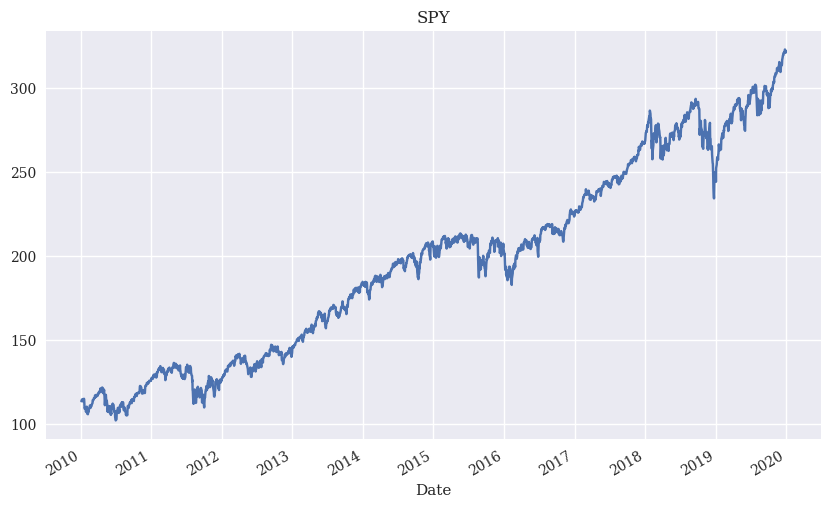

In [13]:
bb = BacktestBase('SPY', '2010-01-04', '2019-12-31', 10000)
print(bb.data.info())
print(bb.data.tail())
bb.plot_data()

BacktestLongOnly.run_strategy()

In [1]:
from BacktestBase import *

class BacktestLongOnly(BacktestBase):

    def sma_strategy(self, SMA1, SMA2):
        
        self.position = 0
        self.trades = 0
        self.amount = self.initial_amount
        self.data['SMA1'] = self.data['price'].rolling(SMA1).mean()
        self.data['SMA2'] = self.data['price'].rolling(SMA2).mean()
        
        for bar in range(SMA2, len(self.data)):
            if self.position == 0:
                if self.data['SMA1'].iloc[bar] > self.data['SMA2'].iloc[bar]:
                    self.place_buy_order(bar, amount = self.amount)
                    self.position = 1
            elif self.position ==1:
                if self.data['SMA1'].iloc[bar] > self.data['SMA2'].iloc[bar]:
                    self.place_sell_order(bar, units=self.units)
                    self.position = 0 
        self.close_out(bar)
    
    if __name__ == '__main__':
        
        def run_strategy():
            lobt.run_sma_strategy(42, 252)
        lobt = BacktestLongOnly('SPY', '2010-01-04', '2019-12-31', 10000, verbose = False)
        
        run_strategy()
        
        lobt = BacktestLongOnly('SPY', '2010-01-04', '2019-12-31', 10000, 10.0, 0.01, False)
        
        run_strategy()
    
